https://mp.weixin.qq.com/s?__biz=MzIyNjM2MzQyNg==&mid=2247488883&idx=1&sn=eb90805b42b6d80dba3884703d72757b&chksm=e870c43edf074d2814019d90cff61cb0bd5a9a0a4c9517933eeb6d283dc2a22ca6029a1fc0d7&mpshare=1&scene=1&srcid=&sharer_sharetime=1582028605986&sharer_shareid=8724c7983f20914ec3c0c086bba89335&key=80835432ad7ecc2c0306983147e7c8ded86e2744cc255fb5d299e8023d2bffad8477cb63554bd3b74794ec9369dd4fee50bc57405c143838cfd914ed73584816343c0f646855307019414e78a79a52a8&ascene=1&uin=MjA1MjAyODkxNg%3D%3D&devicetype=Windows+10&version=6208006f&lang=zh_CN&exportkey=AZCLc62jhhqzSng6q2Jdv9U%3D&pass_ticket=5UMfqjenOts%2FADRWzc0aoqOwFIJvlXozAkvcTEp3c9SVaRrxFcDykecADS7StHaB

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_df=pd.read_csv("../../dataset/titanic/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


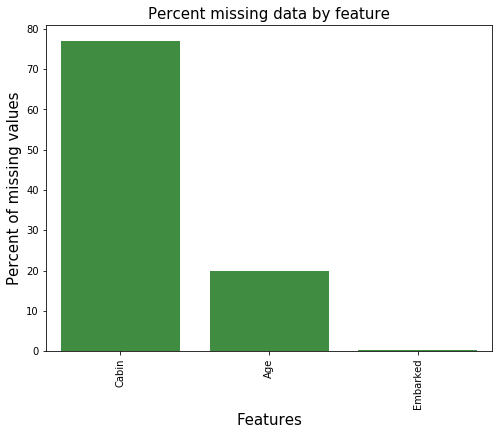

In [3]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

missingdata(train_df)

In [4]:
# 数据清理
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

In [5]:
drop_column = ['Cabin']
train_df.drop(drop_column, axis=1, inplace = True)

In [6]:
print('check the nan value in train data')
print(train_df.isnull().sum())

check the nan value in train data
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [7]:
all_data = train_df

In [8]:
for dataset in all_data:
    all_data['FamilySize'] = all_data['SibSp'] + all_data['Parch'] + 1
import re


# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""


# Create a new feature Title, containing the titles of passenger names
for dataset in all_data:
    all_data['Title'] = all_data['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in all_data:
    all_data['Title'] = all_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don',
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    all_data['Title'] = all_data['Title'].replace('Mlle', 'Miss')
    all_data['Title'] = all_data['Title'].replace('Ms', 'Miss')
    all_data['Title'] = all_data['Title'].replace('Mme', 'Mrs')
for dataset in all_data:
    all_data['Age_bin'] = pd.cut(all_data['Age'], bins=[0, 14, 20, 40, 120],
                                labels=['Children', 'Teenage', 'Adult', 'Elder'])
for dataset in all_data:
    all_data['Fare_bin'] = pd.cut(all_data['Fare'], bins=[0, 7.91, 14.45, 31, 120],
                                 labels=['Low_fare', 'median_fare', 'Average_fare', 'high_fare'])

In [9]:
traindf = train_df

In [10]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title,Age_bin,Fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Mr,Adult,Low_fare
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Mrs,Adult,high_fare
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Miss,Adult,median_fare
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Mrs,Adult,high_fare
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Mr,Adult,median_fare


In [11]:
drop_column = ['Age', 'Fare', 'Name', 'Ticket']
traindf.drop(drop_column, axis=1, inplace=True)

In [12]:
traindf.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,Title,Age_bin,Fare_bin
0,1,0,3,male,1,0,S,2,Mr,Adult,Low_fare
1,2,1,1,female,1,0,C,2,Mrs,Adult,high_fare
2,3,1,3,female,0,0,S,1,Miss,Adult,median_fare
3,4,1,1,female,1,0,S,2,Mrs,Adult,high_fare
4,5,0,3,male,0,0,S,1,Mr,Adult,median_fare


In [13]:
drop_column = ['PassengerId']
traindf.drop(drop_column, axis=1, inplace=True)
traindf = pd.get_dummies(traindf, columns=["Sex", "Title", "Age_bin", "Embarked", "Fare_bin"],
                         prefix=["Sex", "Title", "Age_type", "Em_type", "Fare_type"])

In [14]:
traindf.head()

,Survived,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,0,3,1,0,2,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
1,1,1,1,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,1,3,0,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
3,1,1,1,0,2,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0,3,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0


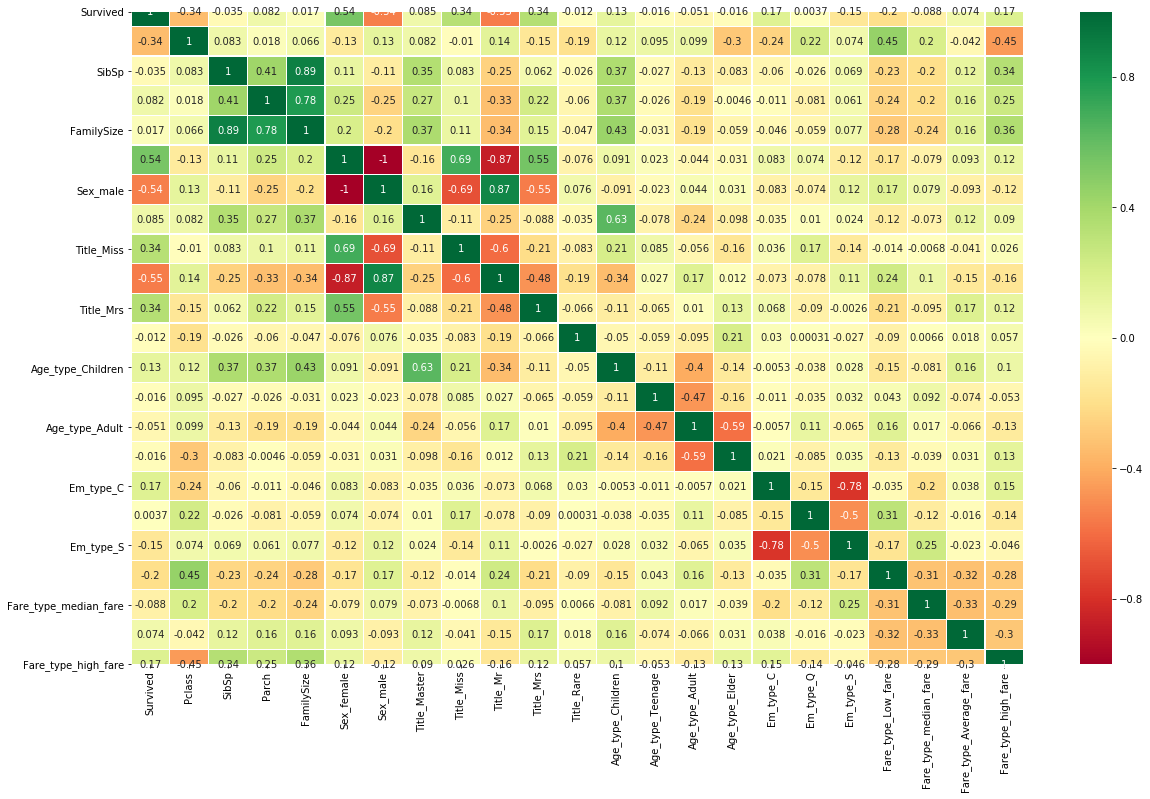

In [15]:
sns.heatmap(traindf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
all_features = traindf.drop("Survived",axis=1)
Targeted_feature = traindf["Survived"]
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 22), (268, 22), (623,), (268,))

--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 82.09
The cross validated score for Random Forest Classifier is: 83.51


Text(0.5, 1.05, 'Confusion_matrix')

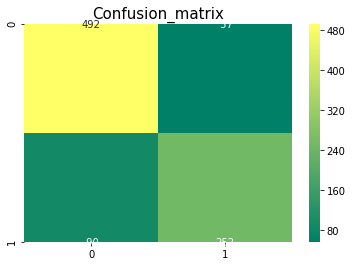

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model.fit(X_train,y_train)
prediction_rm=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Random Forest Classifier is', round(accuracy_score(prediction_rm,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [20]:
from sklearn.model_selection import GridSearchCV
# Random Forest Classifier Parameters tunning 
model = RandomForestClassifier()
n_estim=range(100,1000,100)
## Search grid for optimal parameters
param_grid = {"n_estimators" :n_estim}
model_rf = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)
model_rf.fit(X_train,y_train)
# Best score
print(model_rf.best_score_)
#best estimator
model_rf.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    9.5s finished


0.8105939004815409


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)